In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

%matplotlib inline

In [2]:
# Loading in the data as a pandas dataframe

dataset = pd.read_excel('Customers2.xlsx')

In [3]:
dataset.head()

,CustomerID,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Language,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,1,33,19,1,0,1,German,Germany,10.0,0.0,Yes,No
1,2,0,1,0,1,0,English,USA,61.0,0.0,No,No
2,3,4,6,2,0,0,Spanish,Mexico,1.0,0.0,No,No
3,4,0,10,0,0,1,English,India,26.0,0.0,No,No
4,5,7,0,0,0,0,English,USA,11.0,0.0,No,Yes


In [4]:
# Removing unnecessary columns

dataset = dataset.drop(columns = ['CustomerID','Language'])

In [5]:
dataset.describe()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits
count,753.000000,753.000000,753.000000,753.000000,753.000000,739.000000,739.000000
mean,5.946879,1.284197,0.358566,0.339973,0.265604,4.209743,3.645467
std,8.759028,3.767721,0.929129,0.838697,1.229556,10.613721,12.600658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,0.000000,0.000000,0.000000,3.500000,1.000000
max,55.000000,41.000000,11.000000,6.000000,14.000000,133.000000,117.000000


In [6]:
dataset.shape

(753, 10)

In [7]:
dataset.isnull().sum(axis = 0)

NumCalls          0
NumEmails         0
NumDownloads      0
NumEvents         0
NumForms          0
Country           0
WebVisits        14
PageVisits       14
PriorClient       0
MadeAPurchase     0
dtype: int64

In [8]:
# Removing Rows having null values

dataset.dropna(inplace=True)
dataset.isnull().sum(axis = 0)

NumCalls         0
NumEmails        0
NumDownloads     0
NumEvents        0
NumForms         0
Country          0
WebVisits        0
PageVisits       0
PriorClient      0
MadeAPurchase    0
dtype: int64

In [9]:
dataset.shape

(739, 10)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 0 to 752
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumCalls       739 non-null    int64  
 1   NumEmails      739 non-null    int64  
 2   NumDownloads   739 non-null    int64  
 3   NumEvents      739 non-null    int64  
 4   NumForms       739 non-null    int64  
 5   Country        739 non-null    object 
 6   WebVisits      739 non-null    float64
 7   PageVisits     739 non-null    float64
 8   PriorClient    739 non-null    object 
 9   MadeAPurchase  739 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 63.5+ KB


In [11]:
# Converting floats to ints

dataset["WebVisits"] = dataset["WebVisits"].astype(int)
dataset["PageVisits"] = dataset["PageVisits"].astype(int)

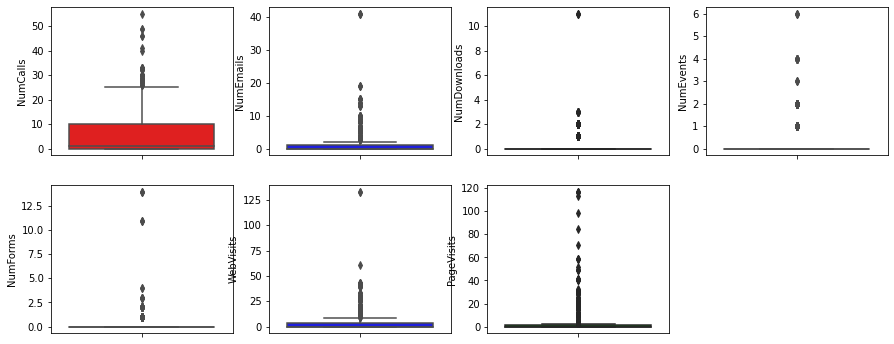

In [12]:
# Outliers

plt.figure(figsize=(15,6))

plt.subplot(2,4,1)
sb.boxplot(y=dataset["NumCalls"], color="red")

plt.subplot(2,4,2)
sb.boxplot(y=dataset["NumEmails"], color="blue")

plt.subplot(2,4,3)
sb.boxplot(y=dataset["NumDownloads"], color="green")

plt.subplot(2,4,4)
sb.boxplot(y=dataset["NumEvents"], color="yellow")

plt.subplot(2,4,5)
sb.boxplot(y=dataset["NumForms"], color="red")

plt.subplot(2,4,6)
sb.boxplot(y=dataset["WebVisits"], color="blue")

plt.subplot(2,4,7)
sb.boxplot(y=dataset["PageVisits"], color="green")

plt.show()

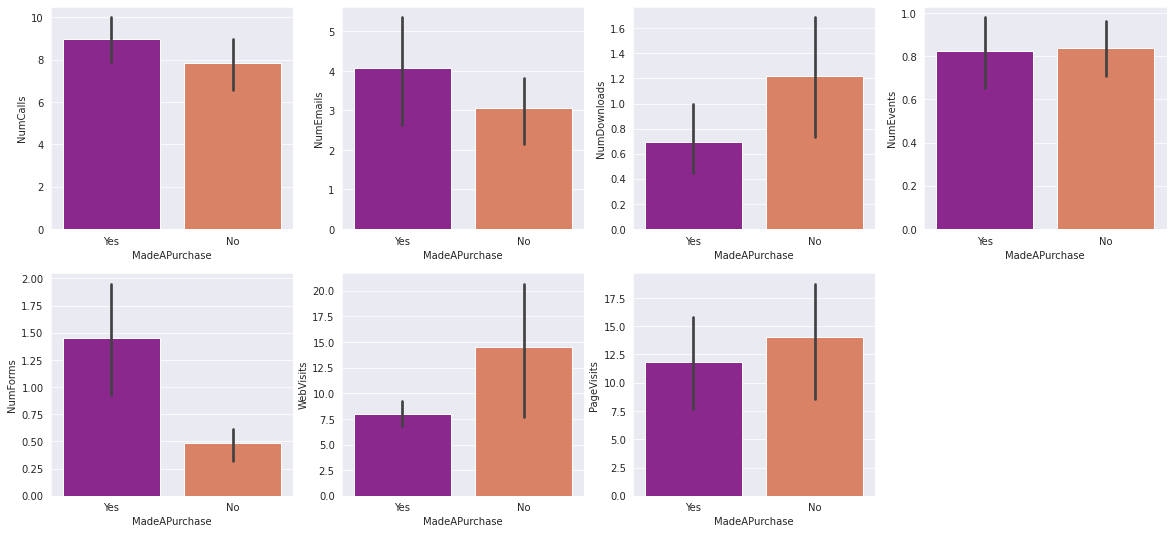

In [13]:
# Effect of each column on target

plt.figure(figsize=(20,9))
sb.set_style('darkgrid') 

# mean
#sb.barplot(x ='MadeAPurchase', y ='NumCalls', data = dataset, palette ='plasma', order = ['Yes', 'No']) 

# std
plt.subplot(2,4,1)
sb.barplot(x ='MadeAPurchase', y ='NumCalls', data = dataset,
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,2)
sb.barplot(x ='MadeAPurchase', y ='NumEmails', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,3)
sb.barplot(x ='MadeAPurchase', y ='NumDownloads', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,4)
sb.barplot(x ='MadeAPurchase', y ='NumEvents', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,5)
sb.barplot(x ='MadeAPurchase', y ='NumForms', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,6)
sb.barplot(x ='MadeAPurchase', y ='WebVisits', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.subplot(2,4,7)
sb.barplot(x ='MadeAPurchase', y ='PageVisits', data = dataset, 
           palette ='plasma', estimator = np.std, order = ['Yes', 'No'])
plt.show()

In [14]:
# Buliding the Model

# Label Encoding the categorical Yes/No columns

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataset["MadeAPurchase"] = label.fit_transform(dataset["MadeAPurchase"])
dataset["PriorClient"] = label.fit_transform(dataset["PriorClient"])

In [15]:
dataset.head()

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase
0,33,19,1,0,1,Germany,10,0,1,0
1,0,1,0,1,0,USA,61,0,0,0
2,4,6,2,0,0,Mexico,1,0,0,0
3,0,10,0,0,1,India,26,0,0,0
4,7,0,0,0,0,USA,11,0,0,1


In [16]:
dataset["Country"].value_counts()

USA            176
Canada         150
Japan           71
France          43
China           38
Mexico          36
Spain           27
Colombia        26
Brazil          24
India           24
Switzerland     22
Singapore       18
Italy           17
Germany          9
Finland          9
Austria          6
Belgium          6
Netherlands      6
Chile            5
Serbia           3
Uganda           3
Hungary          3
Peru             3
Argentina        3
Thailand         3
Norway           3
Denmark          3
Portugal         2
Name: Country, dtype: int64

In [17]:
# Picking out the top 5 most common countries

top5 = [x for x in dataset["Country"].value_counts().head(5).index]
top5

['USA', 'Canada', 'Japan', 'France', 'China']

In [18]:
# One-Hot Encoding the Countries, if it's present in the top 5, label=1
# We dont fall in the dummy trap as we have removed the 'Others' column

for label in top5:
    dataset[label] = np.where(dataset["Country"]==label, 1, 0)

In [19]:
dataset.head(10)

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,Country,WebVisits,PageVisits,PriorClient,MadeAPurchase,USA,Canada,Japan,France,China
0,33,19,1,0,1,Germany,10,0,1,0,0,0,0,0,0
1,0,1,0,1,0,USA,61,0,0,0,1,0,0,0,0
2,4,6,2,0,0,Mexico,1,0,0,0,0,0,0,0,0
3,0,10,0,0,1,India,26,0,0,0,0,0,0,0,0
4,7,0,0,0,0,USA,11,0,0,1,1,0,0,0,0
5,10,1,0,1,0,USA,30,0,1,0,1,0,0,0,0
6,5,0,0,0,0,USA,10,0,0,0,1,0,0,0,0
7,1,0,0,0,0,USA,4,0,0,0,1,0,0,0,0
8,26,0,0,0,0,India,15,0,0,1,0,0,0,0,0
9,11,0,0,0,0,Spain,15,0,1,1,0,0,0,0,0


In [20]:
# Dropping the country column

dataset = dataset.drop(columns = ['Country'])

In [21]:
dataset.head(10)

,NumCalls,NumEmails,NumDownloads,NumEvents,NumForms,WebVisits,PageVisits,PriorClient,MadeAPurchase,USA,Canada,Japan,France,China
0,33,19,1,0,1,10,0,1,0,0,0,0,0,0
1,0,1,0,1,0,61,0,0,0,1,0,0,0,0
2,4,6,2,0,0,1,0,0,0,0,0,0,0,0
3,0,10,0,0,1,26,0,0,0,0,0,0,0,0
4,7,0,0,0,0,11,0,0,1,1,0,0,0,0
5,10,1,0,1,0,30,0,1,0,1,0,0,0,0
6,5,0,0,0,0,10,0,0,0,1,0,0,0,0
7,1,0,0,0,0,4,0,0,0,1,0,0,0,0
8,26,0,0,0,0,15,0,0,1,0,0,0,0,0
9,11,0,0,0,0,15,0,1,1,0,0,0,0,0


In [22]:
# Another way of label encoding

# cleanup_nums = {"Country":  {"USA": 0, "Canada": 1, "Japan": 2, "France": 3, "China": 4, "Mexico": 5,
#                              "Spain": 5, "Colombia": 5, "India": 5, "Brazil": 5, "Switzerland": 5,
#                              "Singapore": 5, "Italy": 5, "Germany": 5, "Finland": 5, "Belgium": 5,
#                              "Netherlands": 5, "Austria": 5, "Chile": 5, "Argentina": 5, "Thailand": 5,
#                              "Uganda": 5, "Serbia": 5, "Hungary": 5, "Norway": 5, "Peru": 5, "Denmark": 5,
#                              "Portugal": 5}}
# dataset.replace(cleanup_nums, inplace=True)
# dataset.head()

In [23]:
# Combining all Interactions into a single column

dataset["TotalInteractions"] = dataset["NumCalls"] + dataset["NumEmails"] + dataset["NumDownloads"] \
        + dataset["NumEvents"] + dataset["NumForms"] + dataset["PageVisits"] + dataset["WebVisits"]

In [24]:
# Dropping columns

dataset = dataset.drop(columns = ["NumCalls", "NumEmails", "NumDownloads", "NumEvents", "NumForms",
                                  "PageVisits", "WebVisits"])

In [25]:
# Reordering the columns

dataset = dataset[[column for column in dataset if column not in ['MadeAPurchase']]  + ['MadeAPurchase']]

In [26]:
dataset.head(40)

,PriorClient,USA,Canada,Japan,France,China,TotalInteractions,MadeAPurchase
0,1,0,0,0,0,0,64,0
1,0,1,0,0,0,0,63,0
2,0,0,0,0,0,0,13,0
3,0,0,0,0,0,0,37,0
4,0,1,0,0,0,0,18,1
5,1,1,0,0,0,0,42,0
6,0,1,0,0,0,0,15,0
7,0,1,0,0,0,0,5,0
8,0,0,0,0,0,0,41,1
9,1,0,0,0,0,0,26,1


In [27]:
X = dataset.iloc[:, :-1].values.reshape(739,7)
y = dataset.iloc[:, -1].values.reshape(739,1)

In [28]:
X.shape

(739, 7)

In [29]:
y.shape

(739, 1)

In [30]:
# Splitting into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
import tensorflow as tf

In [33]:
# Building the ANN

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
19/19 [==============================] - 0s 1ms/step - loss: 0.8013 - accuracy: 0.3249
Epoch 2/100
19/19 [==============================] - 0s 1ms/step - loss: 0.7569 - accuracy: 0.3181
Epoch 3/100
19/19 [==============================] - 0s 859us/step - loss: 0.7240 - accuracy: 0.3959
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.5059
Epoch 5/100
19/19 [==============================] - 0s 853us/step - loss: 0.6837 - accuracy: 0.5618
Epoch 6/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.6294
Epoch 7/100
19/19 [==============================] - 0s 872us/step - loss: 0.6609 - accuracy: 0.6531
Epoch 8/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6734
Epoch 9/100
19/19 [==============================] - 0s 893us/step - loss: 0.6447 - accuracy: 0.6751
Epoch 10/100
19/19 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.6751
E

19/19 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7107
Epoch 83/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.7107
Epoch 84/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5891 - accuracy: 0.7107
Epoch 85/100
19/19 [==============================] - 0s 980us/step - loss: 0.5893 - accuracy: 0.7107
Epoch 86/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.7107
Epoch 87/100
19/19 [==============================] - 0s 997us/step - loss: 0.5889 - accuracy: 0.7107
Epoch 88/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7107
Epoch 89/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5889 - accuracy: 0.7107
Epoch 90/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7107
Epoch 91/100
19/19 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7107
Epoch 92/

In [36]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ')
print(cm)
print('Accuracy : ', accuracy_score(y_test, y_pred))

Confusion Matrix : 
[[16 30]
 [ 4 98]]
Accuracy :  0.7702702702702703
